# [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義 <br />
<br />
# [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同? <br />
<br />
# import 需要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Linear Regression

In [7]:
#Read the diabetes dataset
diabetes = datasets.load_diabetes()

#We only use one feature for data visualization
x = diabetes.data[:, np.newaxis, 2]
print("Data shape : ",x.shape)

x_train, x_test, y_train, y_test = train_test_split(x,diabetes.target, test_size = 0.1, random_state = 2019)

#build a linear regression model
Lregr = linear_model.LinearRegression()
#train the training data
Lregr.fit(x_train,y_train)

#pred the test data
y_pred = Lregr.predict(x_test)

Data shape :  (442, 1)


In [8]:
#Check out the Coefficient of Linear regression model
print("Coefficients : ", Lregr.coef_)

#Measure the difference between ground truth and prediction by MSE
print("MSE : ", mean_squared_error(y_test,y_pred))

Coefficients :  [982.22369691]
MSE :  4925.617056584083


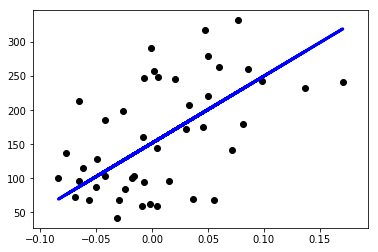

In [9]:
#plot the regression model and data distribution
plt.scatter(x_test,y_test,color = 'black')
plt.plot(x_test, y_pred, color = 'blue', linewidth = 3)
plt.show()

# Logistic regression

In [10]:
#Read the iris dataset
iris = datasets.load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size = 0.1, random_state = 2019)

#build the logistic regression model
logreg = linear_model.LogisticRegression()

#train the logistic regression model
logreg.fit(x_train, y_train)

#predict the result
y_pred = logreg.predict(x_test)

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiejialun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ",acc)

Accuracy :  0.8666666666666667


# [作業重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練 <br />
<br />
# 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

## Wine dataset

In [16]:
#Load the wine dataset
wine = datasets.load_wine()

#Check the wine dataset`s target & data
print(wine.target)
print(wine.data.shape)
print(wine.data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


**The Wine dataset seems like a multi-class problem.**

In [18]:
import pandas as pd
#Check the data type of wine data before train the model
wine_df = pd.DataFrame(wine.data)
wine_label = pd.Series(wine.target)

print(wine_df.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object


In [34]:
train_x, test_x, train_y, test_y = train_test_split(wine_df, wine_label, test_size = 0.1, random_state = 2019)
logreg = linear_model.LogisticRegression(penalty = 'l2', solver = 'newton-cg', multi_class = 'multinomial' )

logreg.fit(train_x,train_y)
y_pred = logreg.predict(test_x)

In [35]:
acc = accuracy_score(test_y,y_pred)
print('Accuracy : ', acc)

Accuracy :  0.9444444444444444


## Boston dataset

In [36]:
boston = datasets.load_boston()
print(boston.data.shape)
print(boston.data)
print(boston.target)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.

**The Boston datasets seems like a regression problem**

In [37]:
boston_df = pd.DataFrame(boston.data)
boston_label = pd.Series(boston.target)

print(boston_df.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object


In [51]:
train_x, test_x, train_y, test_y = train_test_split(boston_df,boston_label,test_size = 0.1, random_state = 2019)

Lreg = linear_model.LinearRegression()
Lreg.fit(train_x, train_y)
y_pred = Lreg.predict(test_x)

In [52]:
print("Coefficient : ", Lreg.coef_)
print("MSE : ", mean_squared_error(y_pred,test_y))

Coefficient :  [-1.34536055e-01  4.62826793e-02  4.54638836e-03  2.74263117e+00
 -1.78863958e+01  3.94883088e+00  2.26885030e-03 -1.45032114e+00
  3.13079536e-01 -1.13197770e-02 -9.69569723e-01  9.43643266e-03
 -5.17242391e-01]
MSE :  22.79042175246122


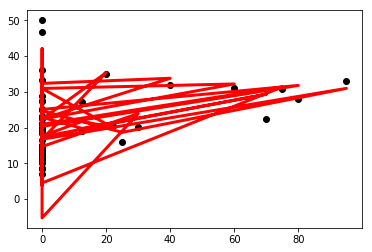

In [58]:
plt.scatter(test_x.iloc[:,1],test_y, color = 'black')
plt.plot(test_x.iloc[:,1],y_pred, color = 'red', linewidth = 3)
plt.show()